In [1]:
!pip install mediapy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [10]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
import numpy as np
from typing import Generator,Iterable,List,Optional
import mediapy as media

In [11]:
model = hub.load("https://tfhub.dev/google/film/1")

In [12]:
_UINT8_MAX_F = float(np.iinfo(np.uint8).max)

def load_image(img_url: str):
  """Returns an image with shape [height, width, num_channels], with pixels in [0..1] range, and type np.float32."""

  if (img_url.startswith("https")):
    user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
    response = requests.get(img_url, headers=user_agent)
    image_data = response.content
  else:
    image_data = tf.io.read_file(img_url)

  image = tf.io.decode_image(image_data, channels=3)
  image_numpy = tf.cast(image, dtype=tf.float32).numpy()
  return image_numpy / _UINT8_MAX_F

In [27]:
image_1_url = "resized_image1.jpg"
image_2_url = "resized_image2.jpg"
time = np.array([0.5], dtype=np.float32)
image1 = load_image(image_1_url)
image2 = load_image(image_2_url)

In [24]:
# from PIL import Image
# def resize_image(input_path, output_path, size):
#     with Image.open(input_path) as img:
#         img_resized = img.resize(size, Image.ANTIALIAS)
#         # Convert RGBA to RGB to remove alpha channel if it exists
#         if img_resized.mode == 'RGBA':
#             img_resized = img_resized.convert('RGB')
#         img_resized.save(output_path)

In [25]:
# resized_image1_path = 'resized_image1.jpg'
# resized_image2_path = 'resized_image2.jpg'
# size = (800, 600)
# resize_image(image_1_url, resized_image1_path, size)
# resize_image(image_2_url, resized_image2_path, size)

<ipython-input-24-a43a20e54a43>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(size, Image.ANTIALIAS)


In [28]:
input = {
    'time': np.expand_dims(time, axis=0),
     'x0': np.expand_dims(image1, axis=0),
     'x1': np.expand_dims(image2, axis=0)
}
mid_frame = model(input)

In [29]:
print(mid_frame.keys())

dict_keys(['image', 'x0_warped', 'backward_residual_flow_pyramid', 'backward_flow_pyramid', 'x1_warped', 'forward_flow_pyramid', 'forward_residual_flow_pyramid'])


input image one,generated image,input image two

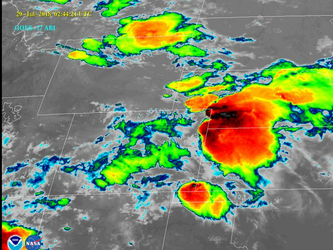
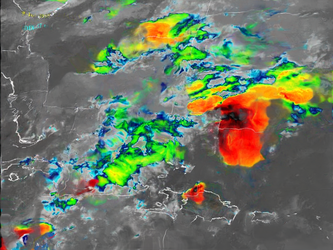
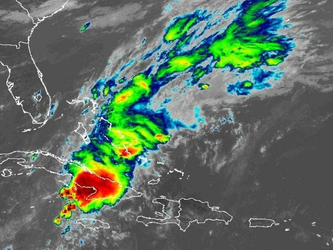

In [30]:
frames = [image1, mid_frame['image'][0].numpy(), image2]

media.show_images(frames, titles=['input image one', 'generated image', 'input image two'], height=250)

In [31]:
media.show_video(frames, fps=3, title='FILM interpolated video')